In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv('train.csv')

In [2]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)
#shuffling the data

In [3]:
a=data[0:1000].T
y=a[0]
x=a[1:n]
x=x/255

In [4]:
d_train=data[1000:m].T
y_train=d_train[0]
x_train=d_train[1:n]
x_train=x_train/255
_,m_train=x_train.shape

In [5]:
y_train

array([2, 9, 8, ..., 1, 4, 4], dtype=int64)

In [6]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
x_train.shape

(784, 41000)

In [7]:
y_train.shape

(41000,)

In [7]:
def init_p():
    w1=np.random.rand(10,784) - 0.5
    b1=np.random.rand(10,1) - 0.5
    w2=np.random.rand(10,10) - 0.5
    b2=np.random.rand(10,1) - 0.5
    return w1,b1,w2,b2

In [8]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(w1, b1, w2, b2, X):
    Z1 = w1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = w2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

In [9]:
def mat(Y):
    mat_Y = np.zeros((Y.size, Y.max() + 1))
    mat_Y[np.arange(Y.size), Y] = 1
    mat_Y = mat_Y.T
    return mat_Y

In [21]:
def backward_prop(Z1, A1, Z2, A2, w1, w2, X, Y):
    mat_Y = mat(Y)
    dZ2 = A2 - mat_Y
    dw2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = w2.T.dot(dZ2) * ReLU_deriv(Z1)
    dw1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    w1 = w1 - alpha * db1    
    w2 = w2 - alpha * dw2  
    b2 = b2 - alpha * db2    
    return w1, b1, w2, b2

In [22]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    w1, b1, w2, b2 = init_p()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(w1, b1, w2, b2, X)
        dw1, db1, dw2, db2 = backward_prop(Z1, A1, Z2, A2, w1, w2, X, Y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))

    return w1, b1, w2, b2

In [23]:
w1, b1, w2, b2 = gradient_descent(x_train, y_train, 0.10, 500)

Iteration:  0
[5 8 3 ... 5 0 0] [9 5 6 ... 2 0 3]
0.10312195121951219
Iteration:  10
[8 8 8 ... 8 8 8] [9 5 6 ... 2 0 3]
0.09670731707317073
Iteration:  20
[8 8 8 ... 8 8 8] [9 5 6 ... 2 0 3]
0.09690243902439025
Iteration:  30
[8 8 8 ... 8 8 8] [9 5 6 ... 2 0 3]
0.09685365853658537
Iteration:  40
[8 8 8 ... 8 8 8] [9 5 6 ... 2 0 3]
0.09685365853658537
Iteration:  50
[8 8 8 ... 8 8 8] [9 5 6 ... 2 0 3]
0.09687804878048781
Iteration:  60
[8 8 8 ... 8 8 8] [9 5 6 ... 2 0 3]
0.09690243902439025
Iteration:  70
[8 8 8 ... 8 8 8] [9 5 6 ... 2 0 3]
0.09690243902439025
Iteration:  80
[8 8 8 ... 8 8 8] [9 5 6 ... 2 0 3]
0.09690243902439025
Iteration:  90
[8 8 8 ... 8 8 8] [9 5 6 ... 2 0 3]
0.09690243902439025
Iteration:  100
[8 8 8 ... 8 8 8] [9 5 6 ... 2 0 3]
0.09690243902439025
Iteration:  110
[8 8 8 ... 8 8 8] [9 5 6 ... 2 0 3]
0.09687804878048781
Iteration:  120
[8 8 8 ... 8 8 8] [9 5 6 ... 2 0 3]
0.09687804878048781
Iteration:  130
[8 8 8 ... 8 8 8] [9 5 6 ... 2 0 3]
0.09687804878048781
Ite

In [28]:
def make_predictions(X, w1, b1, w2, b2):
    _, _, _, A2 = forward_prop(w1, b1, w2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, w1, b1, w2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], w1, b1, w2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  9


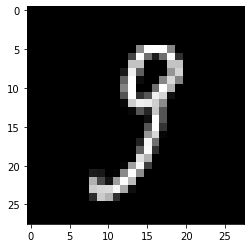

Prediction:  [8]
Label:  5


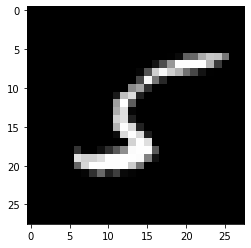

Prediction:  [8]
Label:  6


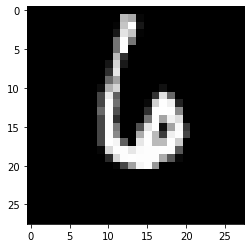

Prediction:  [8]
Label:  1


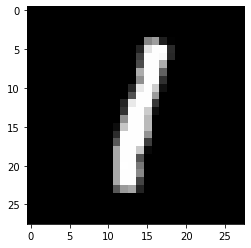

In [34]:
test_prediction(0, w1, b1, w2, b2)
test_prediction(1, w1, b1, w2, b2)
test_prediction(2, w1, b1, w2, b2)
test_prediction(3, w1, b1, w2, b2)

In [35]:
dev_predictions = make_predictions(x, w1, b1, w2, b2)
get_accuracy(dev_predictions, y)

[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 3 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 

0.091